# timestamp is the entry time of that webpage
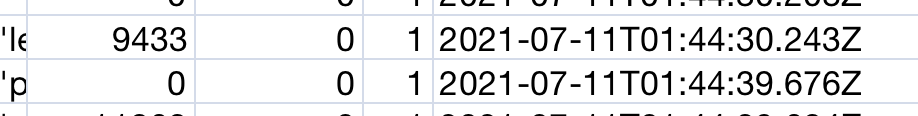

# I will calculate how long he stay on that page 
## I only count timestamp gaps that occur on the same day.
## If the gap between two timestamps is greater than 6hours, it will not be calculated.
## So every last record of each period will be 0, I will set it to NA to avoid affecting the average calculation.
## time duration is measured by mins

In [99]:
import pandas as pd
import numpy as np
  
import time
import datetime

In [100]:
df = pd.read_csv("Cleaned_all_39000000_rows.csv",index_col=False)

In [163]:
# Select the first 1000 actorIds
ID_amount = 1000
df_1000 = df[df['actorId'] < ID_amount]

# Drop home rows
df_1000 = df_1000.drop(df_1000[df_1000['activity'] == 'home'].index)

# sort by id and timestamp, reset index
df_1000 = df_1000.sort_values(['actorId', 'timestamp'],ascending = [True, True])
df_1000.reset_index(inplace=True)
df_1000 = df_1000.drop(["index"],axis = 1)

In [164]:
def get_list(actor_id,df_1000):
    time_list = df_1000[df_1000.actorId == actor_id].timestamp.to_list()
    duration_list = []
    for n in range(0,len(time_list)):
        if n == len(time_list)-1:
            duration_list.append(pd.NA)
            break
            
        date1 = np.array( [ float(i) for i in time_list[n].split('T')[0].split("-")] )
        date2 = np.array( [ float(i) for i in time_list[n+1].split('T')[0].split("-")] )
        
        if (date1==date2).all():
            time1 = np.array( [ float(i) for i in time_list[n].split('T')[1][:-1].split(":")] )
            time2 = np.array( [ float(i) for i in time_list[n+1].split('T')[1][:-1].split(":")] )
            result = time2 - time1
            diff = result[0]*60 + result[1] + result[2]/60

            if diff > 360:
                duration_list.append(pd.NA)
                continue
            duration_list.append(round(diff,3))
            
        else:
            duration_list.append(pd.NA)
            
    return duration_list
    

In [165]:
all_list = []
for i in range(ID_amount):
    all_list.extend(get_list(i,df_1000))

In [166]:
df_1000['Time duration'] = all_list
df_1000.to_csv('time.csv')
df_1000

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response,Time duration
0,0,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN,<NA>
1,0,experienced,NaN,learning,"['home', 'learning']",4,0.0,1.0,0,0,2021-07-06T02:08:30Z,NaN,NaN,NaN,NaN,0.296
2,0,experienced,NaN,notifications,"['home', 'profile', 'notifications']",0,0.0,1.0,0,0,2021-07-06T02:08:47.738Z,NaN,NaN,NaN,NaN,0.001
3,0,experienced,NaN,profile,"['home', 'profile']",25380,0.0,1.0,0,0,2021-07-06T02:08:47.772Z,NaN,NaN,NaN,NaN,0.423
4,0,experienced,NaN,explore,"['home', 'explore']",14835,0.0,1.0,0,0,2021-07-06T02:09:13.152Z,NaN,NaN,NaN,NaN,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548159,999,completed,module,activities,['activities'],6665,1.0,0.0,0,5,2021-10-15T12:39:42.605Z,NaN,NaN,NaN,NaN,0.157
548160,999,experienced,NaN,transcript,"['home', 'profile', 'transcript']",0,0.0,0.0,0,5,2021-10-15T12:39:52.014Z,NaN,NaN,NaN,NaN,0.0
548161,999,experienced,NaN,profile,"['home', 'profile']",0,0.0,0.0,0,5,2021-10-15T12:39:52.023Z,NaN,NaN,NaN,NaN,<NA>
548162,999,experienced,NaN,learning,"['home', 'learning']",0,0.0,0.0,0,5,2022-06-21T07:56:41.943Z,NaN,NaN,NaN,NaN,1.18
